In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\91739\Downloads\archive (3)\Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [2]:
# View first few rows
print(df.head())



   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [3]:
# Dataset info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
None


In [4]:

print(df.describe())

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


In [5]:
print(df.isnull().sum())


YearsExperience    0
Salary             0
dtype: int64


In [7]:
df = df.dropna()
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


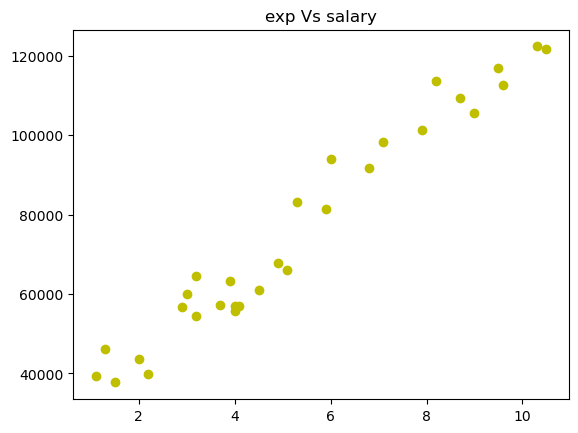

In [10]:
#relationship between them
import matplotlib.pyplot as plt
plt.scatter(df['YearsExperience'],df['Salary'],marker='o',color='y')
plt.title("exp Vs salary")
plt.show()

In [14]:
#Split the Data into Train-Test Sets
x=df['YearsExperience']
y=df['Salary']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
len(X_train)


24

In [15]:
len(X_test)

6

In [22]:
#fit a Linear Regression model
from sklearn.linear_model import LinearRegression
# Create the model
model = LinearRegression()
# Convert Series to DataFrame
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Train the model
model.fit(X_train, y_train)
# Predict on testing set
y_pred = model.predict(X_test)


In [29]:
# b0 and b1
print("Intercept (b0):", model.intercept_)
print("Coefficient (b1):", model.coef_[0])

Intercept (b0): 25321.583011776813
Coefficient (b1): 9423.815323030976


In [39]:
#sample prediction
years = 10
predicted_salary = model.predict([[years]])
predicted_salary


array([119559.73624209])

In [40]:
#evaluate model

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#mae,mse,R^2
#predictions
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#Print results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 6286.453830757749
Mean Squared Error (MSE): 49830096.85590839
R-squared (R²): 0.9024461774180497


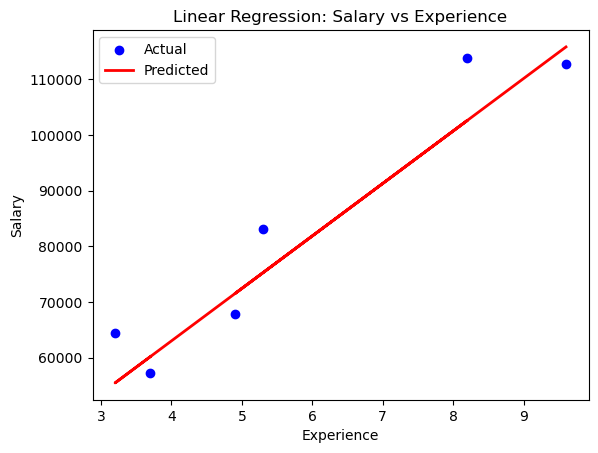

In [46]:
#Plot Regression Line & Interpret Coefficients
plt.scatter(X_test, y_test, color="blue", label="Actual")
# Plot regression line
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Predicted")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Linear Regression: Salary vs Experience")
plt.legend()
plt.show()


In [47]:
print("Intercept (b0):", model.intercept_)
print("Coefficient (b1):", model.coef_[0])


Intercept (b0): 25321.583011776813
Coefficient (b1): 9423.815323030976
